## 準備

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [3]:
nikkei = pd.read_csv('../stock_data/nk400.csv', index_col='Date')[['Nikkei225']]
nk400 = pd.read_csv('../stock_data/nk400.csv', index_col='Date')[['Index']]
nk200 = pd.read_csv('../stock_data/nk200.csv', index_col='Date')[['Index']]

nikkei.index = pd.to_datetime(nikkei.index)
nk400.index = pd.to_datetime(nk400.index)
nk200.index = pd.to_datetime(nk200.index)

In [4]:
## 記述統計

In [5]:
#pd.options.display.float_format = '{:.2f}'.format
# 検証期間 JPX日経中小型株指数連動ETF上場 ~ 2022/7/29まで 1300営業日
variables = pd.concat([nikkei.describe().T, nk400.describe().T, nk200.describe().T])
variables.index = ['Nikkei 225', 'JPX-Nikkei 400', 'JPX-Nikkei Mid Small']
variables = variables[['count', 'mean', 'std', 'min', 'max']]
variables

,count,mean,std,min,max
Nikkei 225,1300.0,23751.428463,3262.929742,16552.830078,30670.099609
JPX-Nikkei 400,1300.0,15881.265385,1610.508109,11760.000000,19620.000000
JPX-Nikkei Mid Small,1300.0,14526.590769,1444.571965,9630.000000,17930.000000


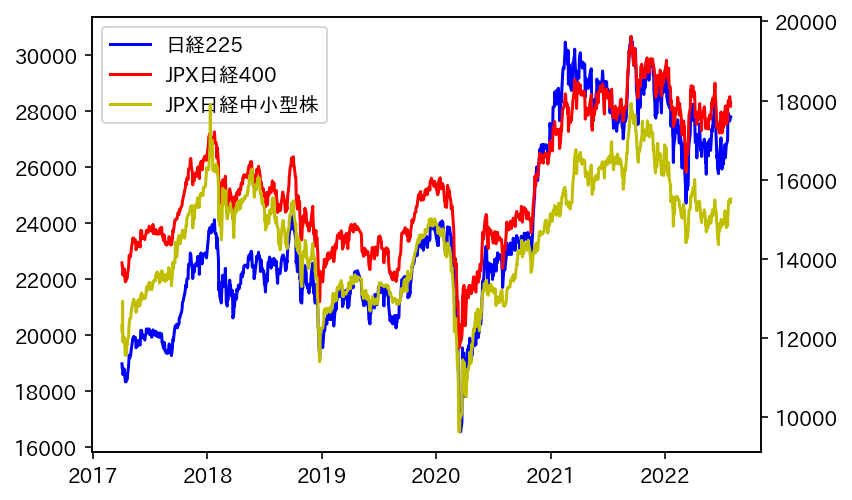

In [75]:
fig = plt.figure()
ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.plot(nikkei, color='b', label='日経225')
ax2.plot(nk400, color='r', label='JPX日経400')
ax2.plot(nk200, color='y', label='JPX日経中小型株') 

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2)
plt.savefig('indexes.png')
plt.show()

In [7]:
def load_data(params):
    timeperiod, nbdevup, nbdevdn, matype = params
    
    # 取得したデータの読み込み
    data_list = []
    csv_name_list = ['nk400_d_upper', 'nk400_d_lower', 'nk400_w_upper', 'nk400_w_lower',
                     'nk200_d_upper', 'nk200_d_lower', 'nk200_w_upper', 'nk200_w_lower']
    for name in csv_name_list:
        data = pd.read_csv('../output/{}_{}_{}_{}/{}.csv'.format(timeperiod, nbdevup, nbdevdn, matype, name), encoding='shift-jis', index_col=0)
        data_list.append(data)
    [nk400_d_upper, nk400_d_lower, nk400_w_upper, nk400_w_lower, nk200_d_upper, nk200_d_lower, nk200_w_upper, nk200_w_lower] = data_list
    
    values = np.array([[len(nk400_d_upper), len(nk400_w_upper), len(nk400_d_lower), len(nk400_w_lower)],
                       #[len(nk400_d_upper.dropna()), len(nk400_w_upper.dropna()), len(nk400_d_lower.dropna()), len(nk400_w_lower.dropna())],
                       [len(nk200_d_upper), len(nk200_w_upper), len(nk200_d_lower), len(nk200_w_lower)],
                       #[len(nk200_d_upper.dropna()), len(nk200_w_upper.dropna()), len(nk200_d_lower.dropna()), len(nk200_w_lower.dropna())]
                      ]).T

    numbers = pd.DataFrame(data=values,
                           #index=pd.MultiIndex.from_arrays([['Upper BBs', 'Upper BBs', 'Lower BBs','Lower BBs'],['Daily data', 'Weekly data', 'Daily data', 'Weekly data']]),
                           #columns=pd.MultiIndex.from_arrays([['JPX-Nikkei 400', 'JPX-Nikkei Mid Small'],['No.' 'No.']])
                          )
    return numbers, data_list

In [8]:
[numbers_20_1_1_0,
 [nk400_d_upper_20_1_1_0, nk400_d_lower_20_1_1_0, nk400_w_upper_20_1_1_0, nk400_w_lower_20_1_1_0, 
  nk200_d_upper_20_1_1_0, nk200_d_lower_20_1_1_0, nk200_w_upper_20_1_1_0, nk200_w_lower_20_1_1_0]] = load_data([20, 1, 1, 0])

[numbers_20_2_2_0,
 [nk400_d_upper_20_2_2_0, nk400_d_lower_20_2_2_0, nk400_w_upper_20_2_2_0, nk400_w_lower_20_2_2_0,
  nk200_d_upper_20_2_2_0, nk200_d_lower_20_2_2_0, nk200_w_upper_20_2_2_0, nk200_w_lower_20_2_2_0]] = load_data([20, 2, 2, 0])

[numbers_20_2_2_1,
 [nk400_d_upper_20_2_2_1, nk400_d_lower_20_2_2_1, nk400_w_upper_20_2_2_1, nk400_w_lower_20_2_2_1,
  nk200_d_upper_20_2_2_1, nk200_d_lower_20_2_2_1, nk200_w_upper_20_2_2_1, nk200_w_lower_20_2_2_1]] = load_data([20, 2, 2, 1])

[numbers_20_3_3_0,
 [nk400_d_upper_20_3_3_0, nk400_d_lower_20_3_3_0, nk400_w_upper_20_3_3_0, nk400_w_lower_20_3_3_0,
  nk200_d_upper_20_3_3_0, nk200_d_lower_20_3_3_0, nk200_w_upper_20_3_3_0, nk200_w_lower_20_3_3_0]] = load_data([20, 3, 3, 0])

In [9]:
numbers_20_1_1_0

,0,1
0,156061,73078
1,32350,14817
2,120213,60996
3,22313,11242


In [10]:
numbers_20_2_2_0

,0,1
0,35938,17708
1,7429,3974
2,27452,13186
3,4619,2164


In [11]:
numbers_20_2_2_1

,0,1
0,24601,11992
1,4747,2636
2,16347,8389
3,3111,1458


In [12]:
numbers_20_3_3_0

,0,1
0,2565,1734
1,356,340
2,1949,1090
3,509,187


## イベントスタディの結果をまとめる

In [27]:
# データを渡すと平均値算出, 有意性検定を行い, DataFrameを返す関数
def get_mean_and_test(data):
    df = pd.DataFrame(index=[1,2,3,4,5], columns=['ARs', 'p', 'p-test', 'CARs', 't', 't-test'])

    df['ARs'] = list(data[['ar1', 'ar2', 'ar3', 'ar4', 'ar5']].mean())
    df['CARs'] = list(data[['car1', 'car2', 'car3', 'car4', 'car5']].mean())

    p_list = []
    p_test = []
    t_list = []
    t_test = []

    # AR p-test
    for ar in ['ar1', 'ar2', 'ar3', 'ar4', 'ar5']:
        t, p = stats.ttest_1samp(data.dropna()[ar], popmean=0)
        p_list.append(p)

        if p < 0.001:
            p_test.append('***')
        elif p < 0.01:
            p_test.append('**')
        elif p < 0.05:
            p_test.append('*')
        elif p > 0.05:
            p_test.append('')

    # CAR t-test 
    for car in ['car1', 'car2', 'car3', 'car4', 'car5']:
        t, p = stats.ttest_1samp(data.dropna()[car], popmean=0)
        t_list.append(t)

        if abs(t) > stats.norm.interval(alpha=0.999, loc=0, scale=1)[1]:
            t_test.append('***')
        elif abs(t) > stats.norm.interval(alpha=0.99, loc=0, scale=1)[1]:
            t_test.append('**')
        elif abs(t) > stats.norm.interval(alpha=0.95, loc=0, scale=1)[1]:
            t_test.append('*')
        elif abs(t) < stats.norm.interval(alpha=0.95, loc=0, scale=1)[1]:
            t_test.append('')

    df['p'] = p_list
    df['p-test'] = p_test
    df['t'] = t_list
    df['t-test'] = t_test
    
    #df['ARs'] = df['ARs'].map(lambda x: '{:.2%}'.format(x))
    #df['CARs'] = df['CARs'].map(lambda x: '{:.2%}'.format(x))
    #df['p'] = df['p'].map(lambda x: '{:.3f}'.format(x))
    #df['t'] = df['t'].map(lambda x: '{:.3f}'.format(x))
    
    return df

In [14]:
def TablePlot(data, file_name):
    print(file_name)
    df = get_mean_and_test(data)
    fig, ax = plt.subplots(figsize=(4,2))
    #df['ARs'] = df['ARs'].map(lambda x: '{:.2%}'.format(x))
    #df['CARs'] = df['CARs'].map(lambda x: '{:.2%}'.format(x))
    #df['p'] = df['p'].map(lambda x: '{:.3f}'.format(x))
    #df['t'] = df['t'].map(lambda x: '{:.3f}'.format(x))
    ax.axis('off')
    ax.table(cellText=df.values,
             colLabels=df.columns,
             loc='center',
             bbox=[0,0,1,1])
    plt.savefig('../table/{}.png'.format(file_name))
    plt.show()

In [15]:
data_list = [nk400_d_upper_20_1_1_0, nk400_d_lower_20_1_1_0, nk400_w_upper_20_1_1_0, nk400_w_lower_20_1_1_0, 
             nk200_d_upper_20_1_1_0, nk200_d_lower_20_1_1_0, nk200_w_upper_20_1_1_0, nk200_w_lower_20_1_1_0,
             nk400_d_upper_20_2_2_0, nk400_d_lower_20_2_2_0, nk400_w_upper_20_2_2_0, nk400_w_lower_20_2_2_0,
             nk200_d_upper_20_2_2_0, nk200_d_lower_20_2_2_0, nk200_w_upper_20_2_2_0, nk200_w_lower_20_2_2_0,
             nk400_d_upper_20_2_2_1, nk400_d_lower_20_2_2_1, nk400_w_upper_20_2_2_1, nk400_w_lower_20_2_2_1,
             nk200_d_upper_20_2_2_1, nk200_d_lower_20_2_2_1, nk200_w_upper_20_2_2_1, nk200_w_lower_20_2_2_1,
             nk400_d_upper_20_3_3_0, nk400_d_lower_20_3_3_0, nk400_w_upper_20_3_3_0, nk400_w_lower_20_3_3_0,
             nk200_d_upper_20_3_3_0, nk200_d_lower_20_3_3_0, nk200_w_upper_20_3_3_0, nk200_w_lower_20_3_3_0]

file_name_list = ['nk400_d_upper_20_1_1_0', 'nk400_d_lower_20_1_1_0', 'nk400_w_upper_20_1_1_0', 'nk400_w_lower_20_1_1_0',
                  'nk200_d_upper_20_1_1_0', 'nk200_d_lower_20_1_1_0', 'nk200_w_upper_20_1_1_0', 'nk200_w_lower_20_1_1_0',
                  'nk400_d_upper_20_2_2_0', 'nk400_d_lower_20_2_2_0', 'nk400_w_upper_20_2_2_0', 'nk400_w_lower_20_2_2_0',
                  'nk200_d_upper_20_2_2_0', 'nk200_d_lower_20_2_2_0', 'nk200_w_upper_20_2_2_0', 'nk200_w_lower_20_2_2_0',
                  'nk400_d_upper_20_2_2_1', 'nk400_d_lower_20_2_2_1', 'nk400_w_upper_20_2_2_1', 'nk400_w_lower_20_2_2_1',
                  'nk200_d_upper_20_2_2_1', 'nk200_d_lower_20_2_2_1', 'nk200_w_upper_20_2_2_1', 'nk200_w_lower_20_2_2_1',
                  'nk400_d_upper_20_3_3_0', 'nk400_d_lower_20_3_3_0', 'nk400_w_upper_20_3_3_0', 'nk400_w_lower_20_3_3_0',
                  'nk200_d_upper_20_3_3_0', 'nk200_d_lower_20_3_3_0', 'nk200_w_upper_20_3_3_0', 'nk200_w_lower_20_3_3_0']

In [16]:
for data, file_name in zip(data_list, file_name_list):
    print(file_name)
    display(get_mean_and_test(data))

nk400_d_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.07%,0.000,***,-0.07%,-11.402,***
2,-0.06%,0.000,***,-0.12%,-13.301,***
3,-0.05%,0.000,***,-0.17%,-13.814,***
4,-0.04%,0.000,***,-0.21%,-13.892,***
5,-0.05%,0.000,***,-0.26%,-14.467,***


nk400_d_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,0.03%,0.008,**,0.03%,2.659,**
2,0.03%,0.014,*,0.06%,3.573,***
3,0.02%,0.067,,0.09%,3.917,***
4,0.02%,0.061,,0.11%,4.259,***
5,0.02%,0.065,,0.13%,4.563,***


nk400_w_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.11%,0.002,**,-0.11%,-3.121,**
2,-0.04%,0.310,,-0.14%,-2.911,**
3,-0.05%,0.177,,-0.19%,-3.161,**
4,-0.14%,0.000,***,-0.33%,-4.717,***
5,-0.13%,0.000,***,-0.46%,-5.878,***


nk400_w_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.07%,0.142,,-0.07%,-1.470,
2,-0.20%,0.000,***,-0.26%,-3.751,***
3,-0.12%,0.009,**,-0.39%,-4.138,***
4,-0.02%,0.695,,-0.40%,-3.511,***
5,-0.05%,0.283,,-0.45%,-3.323,***


nk200_d_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.08%,0.000,***,-0.08%,-6.811,***
2,-0.05%,0.000,***,-0.13%,-8.343,***
3,-0.04%,0.000,***,-0.17%,-8.928,***
4,-0.02%,0.049,*,-0.19%,-8.748,***
5,-0.04%,0.000,***,-0.23%,-9.578,***


nk200_d_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,0.08%,0.000,***,0.08%,7.003,***
2,0.04%,0.000,***,0.12%,7.767,***
3,0.02%,0.101,,0.14%,7.418,***
4,0.02%,0.133,,0.16%,7.268,***
5,0.02%,0.076,,0.18%,7.331,***


nk200_w_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.12%,0.103,,-0.12%,-1.629,
2,-0.05%,0.473,,-0.18%,-1.678,
3,-0.09%,0.220,,-0.26%,-2.084,*
4,-0.17%,0.013,*,-0.44%,-3.032,**
5,-0.23%,0.001,***,-0.67%,-4.142,***


nk200_w_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.06%,0.441,,-0.06%,-0.771,
2,-0.01%,0.895,,-0.06%,-0.635,
3,-0.00%,0.992,,-0.07%,-0.525,
4,-0.01%,0.898,,-0.07%,-0.519,
5,-0.04%,0.605,,-0.11%,-0.688,


nk400_d_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.08%,0.000,***,-0.08%,-6.258,***
2,-0.07%,0.000,***,-0.15%,-7.624,***
3,-0.04%,0.002,**,-0.18%,-7.423,***
4,-0.04%,0.003,**,-0.22%,-7.319,***
5,-0.04%,0.000,***,-0.26%,-7.498,***


nk400_d_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.04%,0.366,,0.04%,0.904,
2,0.02%,0.656,,0.06%,0.948,
3,0.02%,0.681,,0.08%,1.002,
4,0.04%,0.435,,0.12%,1.244,
5,0.10%,0.043,*,0.22%,1.990,*


nk400_w_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.17%,0.022,*,-0.17%,-2.298,*
2,-0.06%,0.431,,-0.23%,-2.193,*
3,0.01%,0.918,,-0.22%,-1.753,
4,-0.17%,0.018,*,-0.39%,-2.680,**
5,-0.09%,0.212,,-0.48%,-2.966,**


nk400_w_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.05%,0.698,,0.05%,0.387,
2,-0.40%,0.001,***,-0.36%,-1.964,*
3,-0.02%,0.847,,-0.38%,-1.615,
4,-0.11%,0.328,,-0.49%,-1.759,
5,-0.05%,0.645,,-0.54%,-1.649,


nk200_d_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.06%,0.014,*,-0.06%,-2.465,*
2,-0.05%,0.063,,-0.11%,-3.102,**
3,0.03%,0.232,,-0.08%,-1.919,
4,0.00%,0.870,,-0.08%,-1.599,
5,-0.03%,0.147,,-0.11%,-2.069,*


nk200_d_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.20%,0.000,***,0.20%,7.282,***
2,0.12%,0.000,***,0.32%,8.367,***
3,0.06%,0.016,*,0.39%,8.456,***
4,0.03%,0.193,,0.42%,8.061,***
5,0.03%,0.185,,0.45%,7.930,***


nk200_w_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.10%,0.539,,-0.10%,-0.614,
2,-0.27%,0.067,,-0.37%,-1.760,
3,-0.09%,0.522,,-0.46%,-1.837,
4,-0.24%,0.088,,-0.70%,-2.486,*
5,-0.25%,0.068,,-0.95%,-3.056,**


nk200_w_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.09%,0.634,,0.09%,0.477,
2,-0.12%,0.453,,-0.03%,-0.131,
3,-0.17%,0.367,,-0.20%,-0.624,
4,-0.19%,0.233,,-0.39%,-1.076,
5,-0.17%,0.299,,-0.56%,-1.401,


nk400_d_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.12%,0.059,,-0.12%,-1.886,
2,-0.10%,0.109,,-0.21%,-2.408,*
3,-0.04%,0.501,,-0.25%,-2.299,*
4,-0.06%,0.326,,-0.31%,-2.413,*
5,-0.07%,0.252,,-0.38%,-2.584,**


nk400_d_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.03%,0.095,,0.03%,1.668,
2,0.02%,0.228,,0.05%,1.892,
3,-0.01%,0.740,,0.05%,1.291,
4,0.03%,0.078,,0.08%,1.749,
5,0.05%,0.007,**,0.13%,2.388,*


nk400_w_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.17%,0.073,,-0.17%,-1.791,
2,-0.18%,0.049,*,-0.35%,-2.684,**
3,-0.00%,0.955,,-0.35%,-2.283,*
4,-0.12%,0.195,,-0.47%,-2.601,**
5,-0.14%,0.107,,-0.60%,-3.020,**


nk400_w_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.03%,0.824,,0.03%,0.222,
2,-0.31%,0.031,*,-0.28%,-1.193,
3,0.05%,0.733,,-0.23%,-0.739,
4,0.03%,0.835,,-0.20%,-0.532,
5,0.05%,0.752,,-0.15%,-0.347,


nk200_d_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.02%,0.639,,-0.02%,-0.469,
2,-0.04%,0.231,,-0.05%,-1.166,
3,0.01%,0.716,,-0.04%,-0.777,
4,-0.02%,0.442,,-0.06%,-1.060,
5,-0.03%,0.233,,-0.10%,-1.468,


nk200_d_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.26%,0.000,***,0.26%,7.204,***
2,0.18%,0.000,***,0.44%,8.674,***
3,0.10%,0.002,**,0.54%,9.262,***
4,0.04%,0.231,,0.58%,8.834,***
5,0.05%,0.130,,0.63%,8.783,***


nk200_w_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.04%,0.840,,-0.04%,-0.202,
2,-0.23%,0.214,,-0.27%,-1.056,
3,-0.16%,0.353,,-0.44%,-1.441,
4,-0.35%,0.048,*,-0.78%,-2.269,*
5,-0.39%,0.021,*,-1.17%,-3.120,**


nk200_w_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.64%,0.027,*,0.64%,2.227,*
2,0.32%,0.204,,0.95%,2.476,*
3,0.13%,0.574,,1.08%,2.350,*
4,0.02%,0.918,,1.10%,2.170,*
5,-0.00%,0.985,,1.10%,2.038,*


nk400_d_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.06%,0.364,,0.06%,0.908,
2,-0.10%,0.051,,-0.04%,-0.531,
3,-0.06%,0.202,,-0.10%,-1.127,
4,0.03%,0.582,,-0.08%,-0.748,
5,-0.01%,0.908,,-0.08%,-0.730,


nk400_d_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.51%,0.426,,0.51%,0.796,
2,0.62%,0.329,,1.13%,1.253,
3,0.53%,0.405,,1.66%,1.503,
4,0.54%,0.400,,2.20%,1.722,
5,0.54%,0.398,,2.73%,1.916,


nk400_w_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,-0.10%,0.776,,-0.10%,-0.285,
2,-0.48%,0.134,,-0.58%,-1.241,
3,0.32%,0.394,,-0.25%,-0.411,
4,-0.63%,0.041,*,-0.88%,-1.257,
5,0.03%,0.945,,-0.85%,-1.057,


nk400_w_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,1.36%,0.102,,1.36%,1.675,
2,-0.49%,0.357,,0.87%,0.834,
3,0.48%,0.392,,1.35%,1.250,
4,0.76%,0.107,,2.11%,1.718,
5,-0.09%,0.924,,2.02%,1.173,


nk200_d_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.18%,0.121,,0.18%,1.550,
2,0.05%,0.599,,0.23%,1.520,
3,0.02%,0.864,,0.24%,1.405,
4,0.06%,0.507,,0.30%,1.547,
5,-0.15%,0.064,,0.15%,0.684,


nk200_d_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.24%,0.050,,0.24%,1.963,*
2,0.25%,0.121,,0.49%,2.491,*
3,0.02%,0.826,,0.51%,2.278,*
4,-0.03%,0.776,,0.48%,2.025,*
5,-0.05%,0.588,,0.43%,1.698,


nk200_w_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.40%,0.521,,0.40%,0.644,
2,-0.42%,0.472,,-0.02%,-0.033,
3,-0.37%,0.464,,-0.40%,-0.459,
4,-0.23%,0.620,,-0.63%,-0.647,
5,0.14%,0.764,,-0.49%,-0.467,


nk200_w_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,-0.04%,0.976,,-0.04%,-0.031,
2,3.23%,0.019,*,3.19%,1.876,
3,1.00%,0.409,,4.19%,2.794,**
4,0.04%,0.975,,4.23%,1.800,
5,-1.16%,0.276,,3.07%,1.248,


In [18]:
#for data, file_name in zip(data_list, file_name_list):
#    TablePlot(data, file_name)

In [35]:
import japanize_matplotlib

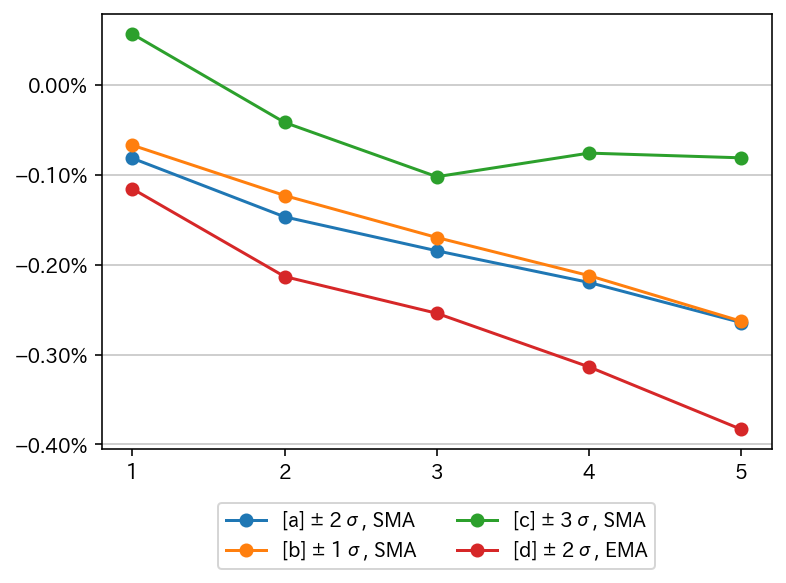

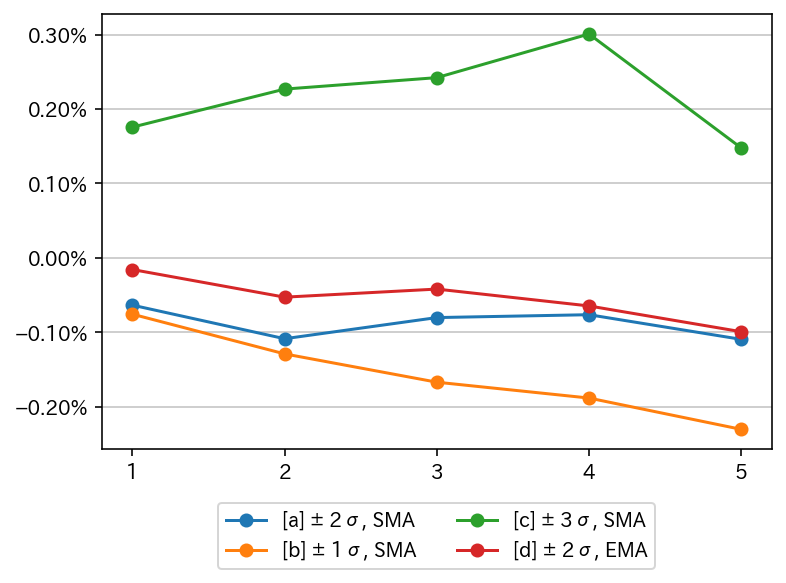

In [89]:
y1 = get_mean_and_test(nk400_d_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_d_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_d_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_d_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('上部 日経400 日次', bbox_inches='tight')
plt.show()

y1 = get_mean_and_test(nk200_d_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_d_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_d_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_d_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('上部 日経中小型 日次', bbox_inches='tight')
plt.show()

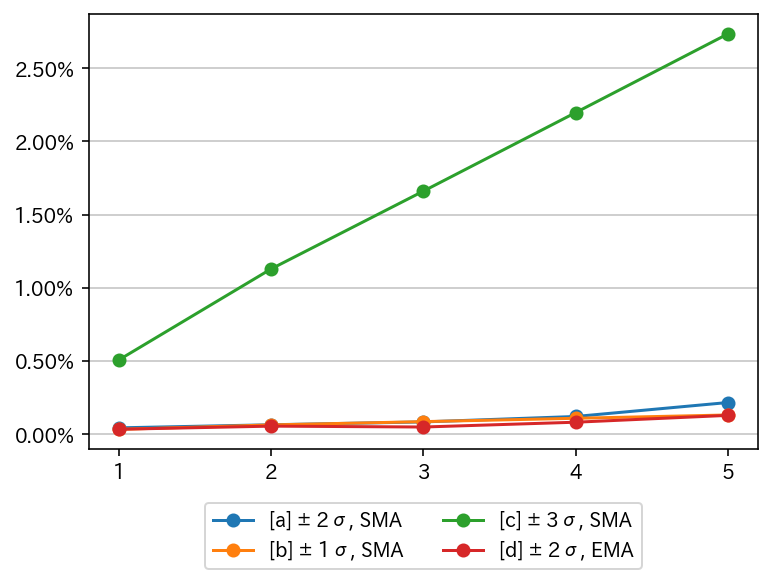

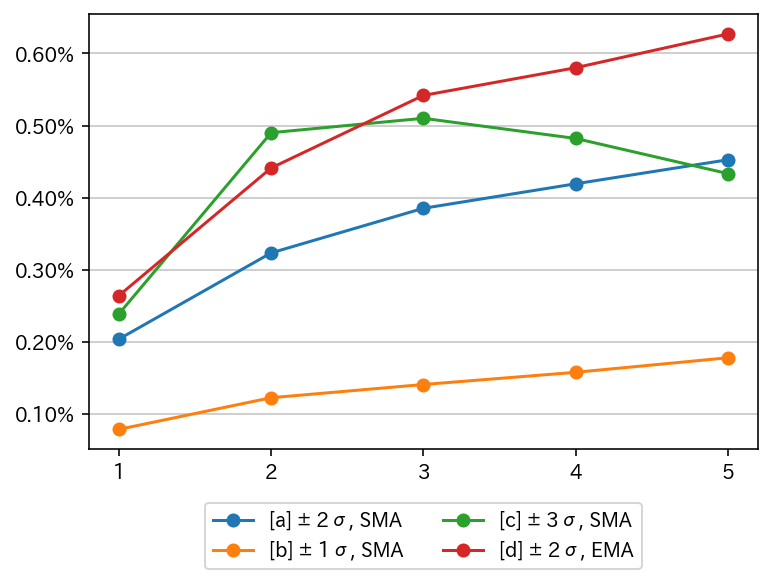

In [90]:
y1 = get_mean_and_test(nk400_d_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_d_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_d_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_d_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('下部 日経400 日次', bbox_inches='tight')
plt.show()

y1 = get_mean_and_test(nk200_d_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_d_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_d_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_d_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('下部 日経中小型 日次', bbox_inches='tight')
plt.show()

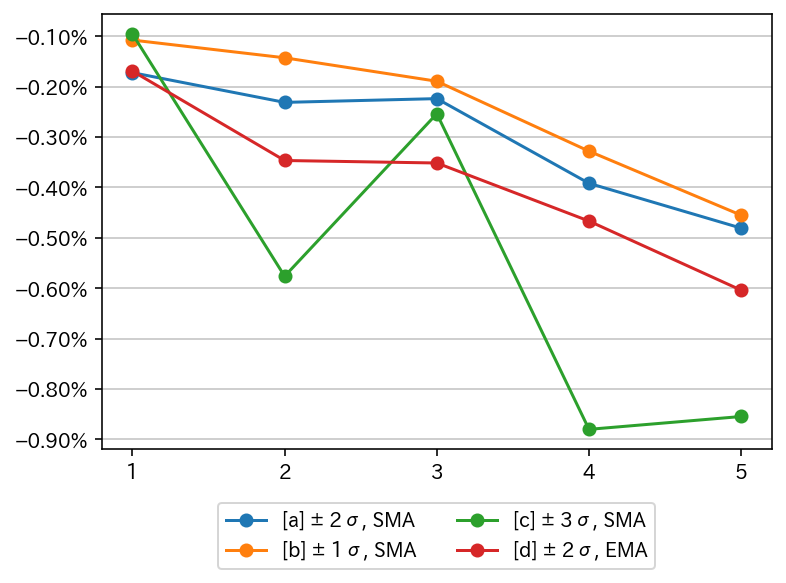

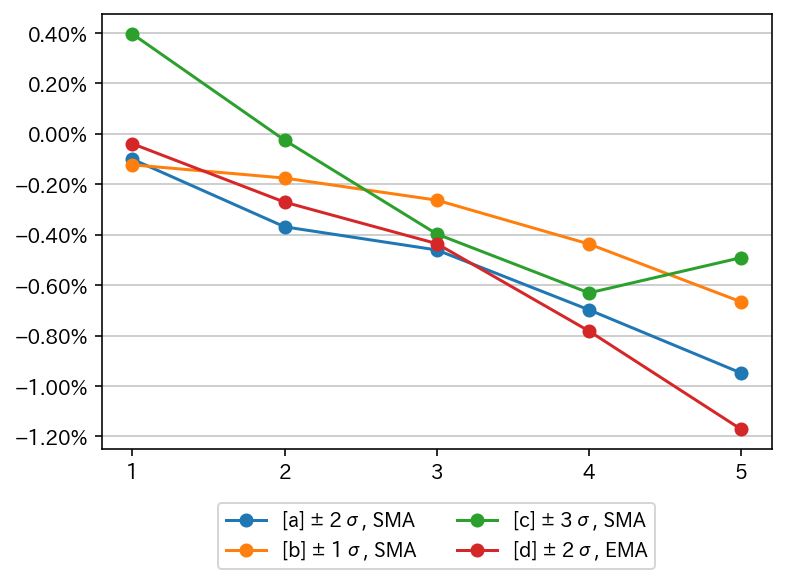

In [91]:
y1 = get_mean_and_test(nk400_w_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_w_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_w_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_w_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('上部 日経400 週次', bbox_inches='tight')
plt.show()

y1 = get_mean_and_test(nk200_w_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_w_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_w_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_w_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('上部 日経中小型 週次', bbox_inches='tight')
plt.show()

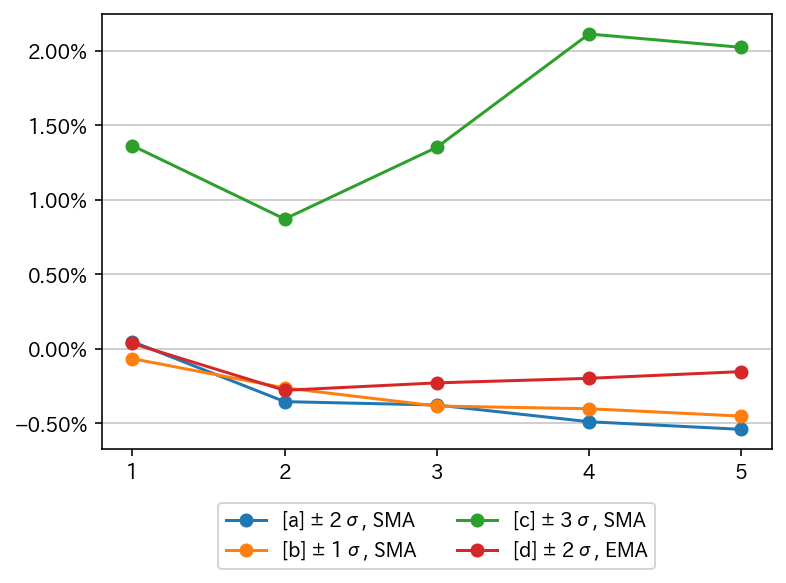

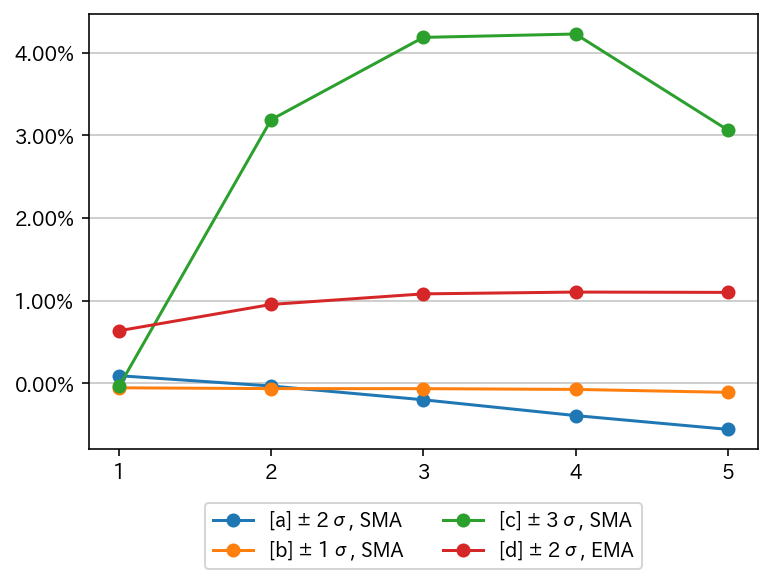

In [92]:
y1 = get_mean_and_test(nk400_w_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_w_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_w_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_w_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('下部 日経400 週次', bbox_inches='tight')
plt.show()

y1 = get_mean_and_test(nk200_w_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_w_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_w_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_w_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.savefig('下部 日経中小型 週次', bbox_inches='tight')
plt.show()

In [ ]:
hoge

## 日次データ

In [ ]:
for df in [nk400_d_upper, nk400_d_lower, nk400_w_upper, nk400_w_lower, nk200_d_upper, nk200_d_lower, nk200_w_upper, nk200_w_lower]:
    TablePlot(res.get_mean_and_test(df))

In [ ]:
def draw_graph(data, title):
    ars = list(data[['ar1', 'ar2', 'ar3', 'ar4', 'ar5']].mean())
    cars = list(data[['car1', 'car2', 'car3', 'car4', 'car5']].mean())
    
    fig, ax = plt.subplots()
    ax.plot([1,2,3,4,5], ars, label='ARs', marker='o')
    ax.plot([1,2,3,4,5], cars, label='CARs', marker='o')
    ax.set_xticks([1,2,3,4,5]) 
    ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0))
    ax.grid(axis='y', alpha = 0.5)
    ax.set_title(title)
    ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3))
    plt.show()

In [ ]:
title_list = []
for a in ['JPX-Nikkei 400', 'JPX-Nikkei Mid Small']:
    for b in ['Daily', 'Weekly']:
        for c in ['Upper BBs', 'Lower BBs']:
            title_list.append('{} / {} / {}'.format(a,b,c))

In [ ]:
for i in range(0,4):
    draw_graph(data_list[i], title_list[i])

In [ ]:
for i in range(4,8):
    draw_graph(data_list[i], title_list[i])